## DBSCAN, Spectral Clustering and Agglomerative Clustering

#### By: Kuan-Lin Chen
#### Last edited: 2021/09/03
---

In this notebook, we'll be learning **DBSCAN Clustering**, another popular **clustering algorithm** for **defining clusters as continuous regions of high density** along with **Spectral clutsering** and **Agglomerative Clustering**

DBSCAN works well when: **Clusters are dense and well separated by low-density regions**


In [1]:
# import packages
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting set-up
plt.rc('font', family = 'serif', size = 13, weight = "bold")
# My Set-Up
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
# Sam's Set-Up
# plt.rc('xtick', labelsize = 10, direction = 'in', top = 'on')
# plt.rc('xtick.major', size = 5, width = 2)
# plt.rc('ytick', labelsize = 10, direction = 'in', right = 'on')
# plt.rc('ytick.major', size = 5, width = 2)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

We will start with **generating some moon cluster dataset.**

In [51]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 2000, noise = 0.05)

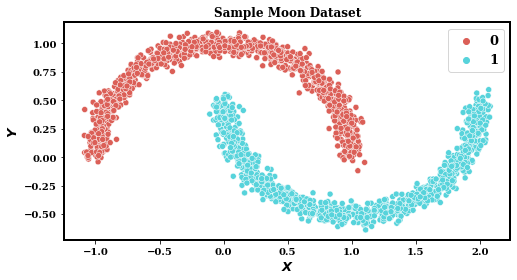

In [52]:
import seaborn as sns

fig = plt.figure(figsize = (8, 4))

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y,\
                palette = sns.hls_palette(2), legend = 'full')

plt.title("Sample Moon Dataset", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

Try out K-Means and see how that goes:

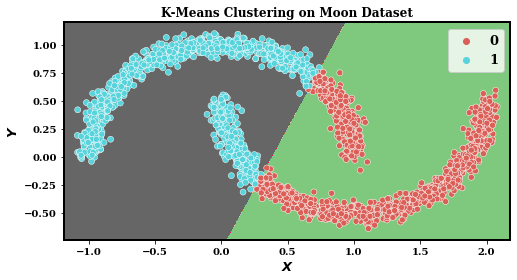

In [53]:
from sklearn.cluster import KMeans
k = 2 # number of clusters
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

fig = plt.figure(figsize = (8, 4))

mins = X.min(axis = 0) - 0.1
maxs = X.max(axis = 0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
            cmap = "Accent")
# plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
#             linewidths=1, colors='k')

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_pred,\
                palette = sns.hls_palette(k), legend = 'full')

plt.title("K-Means Clustering on Moon Dataset", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [62]:
dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.2)

After fitting, DBSCAN store the prediction in ```dbscan.labels_```

In [63]:
dbscan.labels_.shape

(2000,)

Can find out how many classes/labels assigned via

In [64]:
max(dbscan.labels_) + 1

2

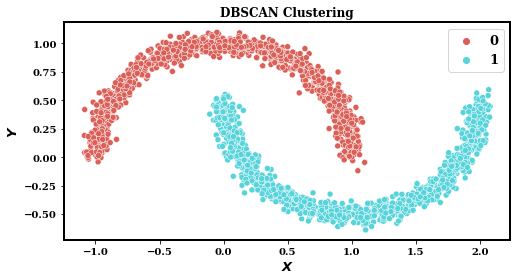

In [71]:
import seaborn as sns

fig = plt.figure(figsize = (8, 4))

sns.scatterplot(x = dbscan.components_[:, 0], y = dbscan.components_[:, 1], hue = dbscan.labels_,\
                palette = sns.hls_palette(max(dbscan.labels_)+1), legend = 'full')

plt.title("DBSCAN Clustering", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

While DBSCAN does not has the predict function, we can do it via ```KNeighborsClassifier```

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier()

### Decision Boundary

We then then plot the decision boundary with the ```predict``` fucntion from the ```KNeighborsClassifier```

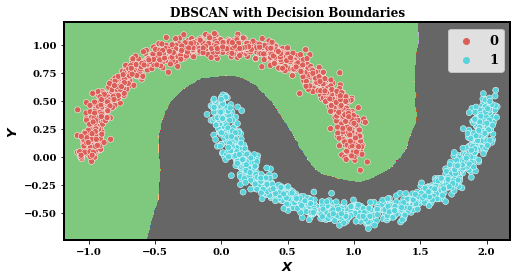

In [70]:
fig = plt.figure(figsize = (8, 4))

mins = X.min(axis = 0) - 0.1
maxs = X.max(axis = 0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
            cmap = "Accent")
# plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
#             linewidths=1, colors='k')

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = dbscan.labels_,\
                palette = sns.hls_palette(2), legend = 'full')

plt.title("DBSCAN with Decision Boundaries", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

## Spectral Clustering

Spectral Clustering takes a similarity matrix between samples and reduces dimensionality, it then do K-Means clustering on the reduced data.

In [72]:
from sklearn.cluster import SpectralClustering

In [73]:
help(SpectralClustering)

Help on class SpectralClustering in module sklearn.cluster._spectral:

class SpectralClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  SpectralClustering(n_clusters=8, *, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None)
 |  
 |  Apply clustering to a projection of the normalized Laplacian.
 |  
 |  In practice Spectral Clustering is very useful when the structure of
 |  the individual clusters is highly non-convex or more generally when
 |  a measure of the center and spread of the cluster is not a suitable
 |  description of the complete cluster. For instance when clusters are
 |  nested circles on the 2D plane.
 |  
 |  If affinity is the adjacency matrix of a graph, this method can be
 |  used to find normalized graph cuts.
 |  
 |  When calling ``fit``, an affinity matrix is constructed using either
 |  kernel f

In [88]:
sc = SpectralClustering(n_clusters = 2, gamma = 100, random_state = 89)
sc.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=89)

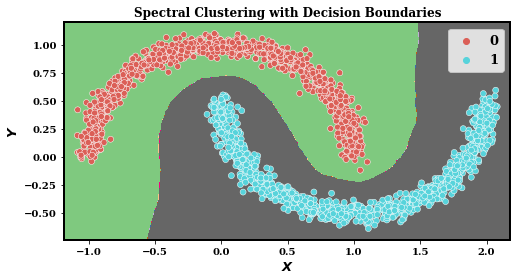

In [89]:
fig = plt.figure(figsize = (8, 4))

mins = X.min(axis = 0) - 0.1
maxs = X.max(axis = 0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X, sc.labels_)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
            cmap = "Accent")

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = sc.labels_,\
                palette = sns.hls_palette(2), legend = 'full')

plt.title("Spectral Clustering with Decision Boundaries", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

#### note that you'll sometimes have to search through different gamma values for the right clustering result.

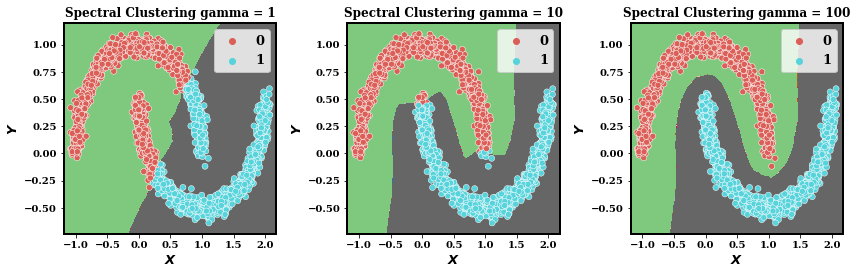

In [91]:
fig = plt.figure(figsize = (12, 4))

ls = [1, 10, 100]

for i in range(3):
    
    plt.subplot(1, 3, i+1)
    
    sc = SpectralClustering(n_clusters = 2, gamma = ls[i], random_state = 89)
    sc.fit(X)

    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))

    knn = KNeighborsClassifier(n_neighbors = 5)

    knn.fit(X, sc.labels_)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                cmap = "Accent")

    sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = sc.labels_,\
                    palette = sns.hls_palette(2), legend = 'full')

    plt.title("Spectral Clustering gamma = {}".format(ls[i]), weight = "bold", fontsize = 12)
    plt.xlabel("$X$")
    plt.ylabel("$Y$")
    
plt.tight_layout()

plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dis

In [103]:
agg = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
agg.fit(X)

AgglomerativeClustering(linkage='single')

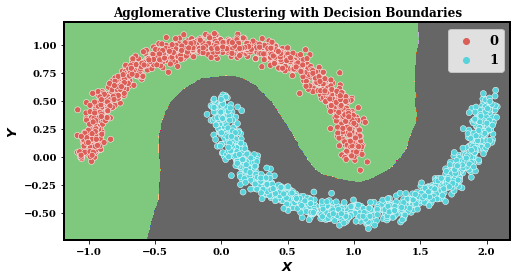

In [105]:
fig = plt.figure(figsize = (8, 4))

mins = X.min(axis = 0) - 0.1
maxs = X.max(axis = 0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X, agg.labels_)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
            cmap = "Accent")

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = agg.labels_,\
                palette = sns.hls_palette(2), legend = 'full')

plt.title("Agglomerative Clustering with Decision Boundaries", weight = "bold", fontsize = 12)
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.show()

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. **Different linkage criterion often produces different outcomes.** Thus is good to find out which works best for your data.

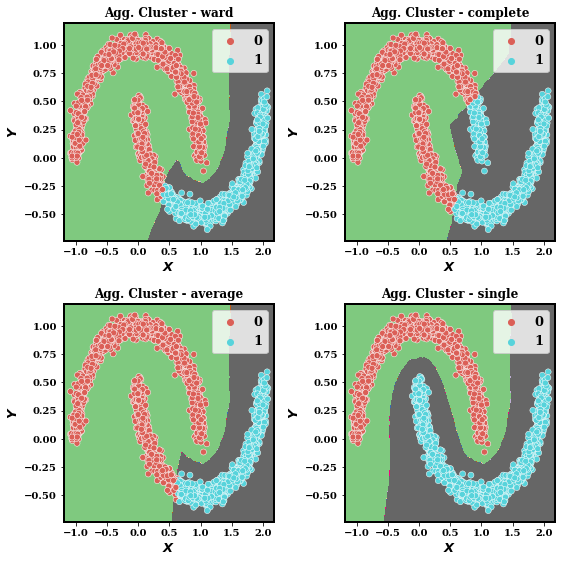

In [108]:
fig = plt.figure(figsize = (8, 8))

ls = ["ward", "complete", "average", "single"]

for i in range(4):
    
    plt.subplot(2, 2, i+1)

    agg = AgglomerativeClustering(n_clusters = 2, linkage = ls[i])
    agg.fit(X)


    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))

    knn = KNeighborsClassifier(n_neighbors = 5)

    knn.fit(X, agg.labels_)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                cmap = "Accent")

    sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = agg.labels_,\
                    palette = sns.hls_palette(2), legend = 'full')

    plt.title("Agg. Cluster - {}".format(ls[i]), weight = "bold", fontsize = 12)
    plt.xlabel("$X$")
    plt.ylabel("$Y$")
    
plt.tight_layout()

plt.show()

References:
   - Hands-On Machine Learning with Scikit-Learn and TensorFlow, Chap.9: Unsupervised  Learning (https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)